# More 3D Coordinate Transformations 2

We have already shown how Python is capable of performing and visualising the standard set of operations for 3D graphics transformations.

There are several additional useful operations than can be performed by matrices. This notebook will examine one of these specific operations: *rotation about an arbitrary axis*.

Note that so far we've only dealt with rotations about the three Cartesian coordinate axis: $x$, $y$ and $z$. What if we need to perform a rotation about an axis that isn't aligned with any of these directions?

In [1]:
## Libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

## Rotation about an arbitrary axis

Another useful tool in our 3D transformation arsenal is the ability to rotate a point (or set of points) by a specified angle about a specified axis.

In the lectures we learned the procedure to carry out this task:


1.   Translate the object to the origin.
2.   Align the rotation axis with the $z-$coordinate ($k$).
3.   Rotate the object by angle $\theta$ about $k$-axis.
4.   Un-align rotation axis and $k$.
5.   Translate object back to original position.

Mathematically, we can express these steps as follows:

$$
 R_{\theta,L} = T_{-\underline{\bf{p}}} A_{{\underline{\bf{v}}},{\underline{\bf{k}}}} R_{\theta, {\underline{\bf{k}}}} \left(A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}\right)^T T_{\underline{\bf{p}}}
$$

where 

* $R_{\theta,L}$ is the rotation of an object through an angle $\theta$ about an axis ${\bf{v}}$,
* $T_{\underline{\bf{-p}}}$ translates one point on the object, ${\bf{p}}$, to the origin,
* $A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}$ aligns the rotation axis with the $z$-direction,
* $R_{\theta, {\underline{\bf{k}}}}$ performs the rotation about $z$ by angle $\theta$,
* $\left(A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}\right)^T$ re-orients the rotation vector back to its original direction ${\bf{v}}$,
* $T_{\underline{\bf{p}}}$ moves the object back to original position ${\bf{p}}$.

Each of these steps is carried out using matrix operations, hence this whole operation is a concatenation of all these matrices.

The fundamental idea here is that we already know how to rotate things about the z-axis:

$$
R_{\theta_{z,\underline{\bf{k}}}}=
	\begin{pmatrix}
	\cos(\theta) & \sin(\theta) & 0  & 0 \\
	-\sin(\theta) & \cos(\theta) & 0 & 0 \\
	0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix}.
$$

Such a rotation would need to occur at the origin, so the familiar translation stages are required:
$$
T_{-\underline{p}} = 
	{\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	-p_x & -p_y & -p_z & 1 
	\end{pmatrix}},~~~
T_{\underline{p}} =
	\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0& 0  \\
	0 & 0 & 1 & 0 \\
	p_x & p_y & p_z & 1 
	\end{pmatrix}.	
$$

The question then becomes, how to align our rotation axis with the z-axis?

The following matrix (found in the formula book) can be readily used to align a vector ${\underline{\bf{v}}}=a{\underline{\bf{\hat{i}}}}+b{\underline{\bf{\hat{j}}}}+c{\underline{\bf{\hat{k}}}}$ with ${\underline{\bf{k}}}\left(=0{\underline{\bf{\hat{i}}}}+0{\underline{\bf{\hat{j}}}}+1{\underline{\bf{\hat{k}}}}\right)$:

$$
A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}=
	\begin{pmatrix}
	\frac{ac}{\lambda|{\underline{\bf{v}}}|} & -\frac{b}{\lambda} & \frac{a}{|{\underline{\bf{v}}}|} & 0 \\
	\frac{bc}{\lambda|{\underline{\bf{v}}}|} & \frac{a}{\lambda} & \frac{b}{|{\underline{\bf{v}}}|} & 0 \\
	-\frac{\lambda}{|{\underline{\bf{v}}}|}  & 0                 & \frac{c}{|{\underline{\bf{v}}}|} & 0 \\
    0 & 0 & 0 & 1
	\end{pmatrix},~~~~ \lambda = \sqrt{a^2+b^2},~~~~~ {\underline{\bf{v}}}=\sqrt{a^2+b^2+c^2}.
$$

To undo this operation, we apply the *transpose* of this matrix:

$$
\left(A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}\right)^T=
	\begin{pmatrix}
	\frac{ac}{\lambda|{\underline{\bf{v}}}|} & \frac{bc}{\lambda{\underline{\bf{v}}}} & -\frac{\lambda}{|{\underline{\bf{v}}}|} & 0 \\
	-\frac{b}{\lambda} & \frac{a}{\lambda} & 0 & 0 \\
	\frac{a}{|{\underline{\bf{v}}}|}  & \frac{b}{|{\underline{\bf{v}}}|}                 & \frac{c}{|{\underline{\bf{v}}}|} & 0 \\
    0 & 0 & 0 & 1
	\end{pmatrix},
$$

which in practise swaps each row of a matrix for its equivalent column.

Let's put our sequence of operations together in Python using an example:

### Lecture example: Rotating a pyramid
**The pyramid defined by coordinates $O(0,0,0), B(1,0,0), C(0,1,0)$ and $D(0,0,1)$ is rotated by $45^o$ about the line that has direction $\vec{v}=\vec{j}+\vec{k}$ and passes through:**


1.   **the origin;**
2.   **the point C(0,1,0).**
**Obtain the vertices of the rotated figure in both cases.**

We will start by defining the coordinates specified in the question:

In [2]:
O = [0,0,0]
B = [1,0,0]
C = [0,1,0]
D = [0,0,1]
x_vals2=[O[0],B[0],C[0],D[0]]
y_vals2=[O[1],B[1],C[1],D[1]]
z_vals2=[O[2],B[2],C[2],D[2]]

Let's first establish what the pyramid looks like prior to any rotation:

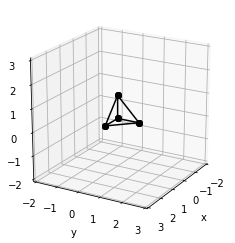

In [3]:
p2 = np.array([x_vals2, y_vals2, z_vals2])
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=30, roll=0)
ax.plot([O[0],C[0]], [O[1],C[1]], [O[2],C[2]], 'ko', linestyle='-')
ax.plot([O[0],B[0]], [O[1],B[1]], [O[2],B[2]], 'ko', linestyle='-')
ax.plot([O[0],D[0]], [O[1],D[1]], [O[2],D[2]], 'ko', linestyle='-')
ax.plot([C[0],B[0]], [C[1],B[1]], [C[2],B[2]], 'ko', linestyle='-')
ax.plot([C[0],D[0]], [C[1],D[1]], [C[2],D[2]], 'ko', linestyle='-')
ax.plot([D[0],B[0]], [D[1],B[1]], [D[2],B[2]], 'ko', linestyle='-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-2, right=3) 
ax.axes.set_ylim3d(bottom=-2, top=3) 
ax.axes.set_zlim3d(bottom=-2, top=3)
plt.gca().set_aspect('equal')
plt.show()

Part of the pyramid already sits at the origin, meaning that we don't require steps 1 and 5 in the sequence (i.e. no translation required). 
We need to:

1. align the rotation vector with z using $A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}$.
2. perform the rotation using $R_{\theta, {\underline{\bf{k}}}}$.
3. unalign the rotation vector $\left(A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}\right)^T$.

The first of these steps requires us to align the vector ${\bf{v}}=0{\bf{\hat{i}}}+1{\bf{\hat{j}}}+1{\bf{\hat{k}}}$ with the ${\bf{k}}$-axis using the alignment matrix:

In [4]:
theta = 45
v = [0,1,1]
mv = np.linalg.norm(v) #modulus of v
lam = np.linalg.norm(v[0:2]) #modulus of first two elements of v
A_vk = np.matrix([[v[0]*v[2]/lam/mv, -v[1]/lam, v[0]/mv, 0], 
                [v[1]*v[2]/lam/mv, v[0]/lam, v[1]/mv, 0], 
                [-lam/mv, 0, v[2]/mv, 0],
                [0, 0, 0, 1]])

Now that we have the alignment matrix set up, Python helps us to very quickly identify the transpose, which we need to "unalign" the rotation vector:

In [5]:
A_vkT = A_vk.transpose()

Finally, we'll set up the rotation matrix in the usual way based on the angle $\theta$ defined a couple of steps ago

In [6]:
R_tk = np.matrix([[np.cos(math.radians(theta)), np.sin(math.radians(theta)), 0, 0],
                      [-np.sin(math.radians(theta)), np.cos(math.radians(theta)), 0, 0], 
                      [0, 0, 1, 0], 
                      [0, 0, 0, 1]]) 

Converting the vertices into a stack of vectors, we can then apply each of these transformations in one go, and print both the original positions, and the rotated ones:

In [7]:
nr2 = [1 for x in range(len(x_vals2))]
kp = np.vstack([p2, nr2])
print("original points:")
print(kp.transpose())
fp = kp.transpose()*A_vk*R_tk*A_vkT
print("rotated points:")
print(fp)

original points:
[[0 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 [0 0 1 1]]
rotated points:
[[ 0.          0.          0.          1.        ]
 [ 0.70710678  0.5        -0.5         1.        ]
 [-0.5         0.85355339  0.14644661  1.        ]
 [ 0.5         0.14644661  0.85355339  1.        ]]


Thus we have rotated the object, and have returned the rotated positions in homogenous coordinates.

We'll convert these positions back to Cartesian coordinates ready for plotting:

In [8]:
newp2 = fp[:,0:3].transpose()
x_vals2n = np.squeeze(np.asarray(newp2[0,:]))
y_vals2n = np.squeeze(np.asarray(newp2[1,:]))
z_vals2n = np.squeeze(np.asarray(newp2[2,:]))
O2 = np.squeeze(np.asarray(newp2[:,0]))
B2 = np.squeeze(np.asarray(newp2[:,1]))
C2 = np.squeeze(np.asarray(newp2[:,2]))
D2 = np.squeeze(np.asarray(newp2[:,3]))

Now we can look to visualise the result. First I will set up some custom arrows for Python to plot: we want to identify the vector about which the rotation is performed.

In [9]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

The plot setup will build on what we have used before. We will include the original pyramid shape (black), and its rotated equivalent (red), plus a blue arrow denoting the axis of rotation:

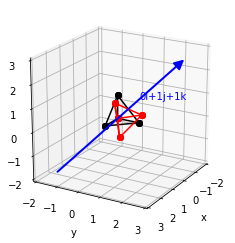

In [10]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=30, roll=0)
ax.plot([O[0],B[0]], [O[1],B[1]], [O[2],B[2]], 'ko', linestyle='-')
ax.plot([O[0],C[0]], [O[1],C[1]], [O[2],C[2]], 'ko', linestyle='-')
ax.plot([O[0],D[0]], [O[1],D[1]], [O[2],D[2]], 'ko', linestyle='-')
ax.plot([C[0],B[0]], [C[1],B[1]], [C[2],B[2]], 'ko', linestyle='-')
ax.plot([D[0],B[0]], [D[1],B[1]], [D[2],B[2]], 'ko', linestyle='-')
ax.plot([C[0],D[0]], [C[1],D[1]], [C[2],D[2]], 'ko', linestyle='-')
ax.plot([O2[0],C2[0]], [O2[1],C2[1]], [O2[2],C2[2]], 'ro', linestyle='-')
ax.plot([O2[0],B2[0]], [O2[1],B2[1]], [O2[2],B2[2]], 'ro', linestyle='-')
ax.plot([O2[0],D2[0]], [O2[1],D2[1]], [O2[2],D2[2]], 'ro', linestyle='-')
ax.plot([C2[0],B2[0]], [C2[1],B2[1]], [C2[2],B2[2]], 'ro', linestyle='-')
ax.plot([C2[0],D2[0]], [C2[1],D2[1]], [C2[2],D2[2]], 'ro', linestyle='-')
ax.plot([D2[0],B2[0]], [D2[1],B2[1]], [D2[2],B2[2]], 'ro', linestyle='-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
vstring="{}i+{}j+{}k".format(v[0],v[1],v[2])
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='b', shrinkA=0, shrinkB=0, linewidth=2)
a = Arrow3D([-3*v[0], 3*v[0]], [-3*v[1], 3*v[1]], [-3*v[2], 3*v[2]], **arrow_prop_dict)
ax.text(v[0], v[1], v[2], vstring, c='b')
ax.add_artist(a)
ax.axes.set_xlim3d(left=-2, right=3) 
ax.axes.set_ylim3d(bottom=-2, top=3) 
ax.axes.set_zlim3d(bottom=-2, top=3)
plt.gca().set_aspect('equal')
plt.show()

As in previous 3D examples, it is difficult to confirm the rotation has been carried out successfully using still 3D images. Try varying the rotation angle of the problem, or the viewing angle in the plotting commands to verify the behaviour of the solution.

### Sanity check (arbitrary axis rotation):
This set of steps is complicated.
There is an alternative to this process, which you can find in the formula booklet:

$$
	{R_{\theta,\underline{\hat{v}}}=
	\begin{pmatrix}
	\alpha^2(1-\cos\theta)+\cos\theta & \alpha\beta(1-\cos\theta)+\gamma\sin\theta & \alpha\gamma(1-\cos\theta)-\beta\sin\theta & 0   \\
	\alpha\beta(1-\cos\theta)-\gamma\sin\theta & \beta^2(1-\cos\theta)+\cos\theta & \beta\gamma(1-\cos\theta)+\alpha\sin\theta  & 0 \\
	\alpha\gamma(1-\cos\theta)+\beta\sin\theta & \beta\gamma(1-\cos\theta)-\alpha\sin\theta & \gamma^2(1-\cos\theta)+\cos\theta & 0 \\
	0 & 0 & 0 & 1 
	\end{pmatrix}},
$$

for a rotation by angle $\theta$ about the unit vector ${\vec{v}}=\alpha{\vec{i}}+\beta{\vec{j}}+\gamma{\vec{k}} $.

**This matrix and applications are not included/tested in this course**, as the mathematics behind this matrix is more involved. However it will produce the same result!

Let's verify our findings using this new matrix:

First, this new matrix needs the axis of rotation to be framed as a unit vector.

I'm too lazy to check if the vector is unit or not: I'll just divide the vector by its modulus (that way if the vector is already unit, dividing by its size won't change the vector):

In [11]:
v_hat = v / np.linalg.norm(v)
print(v_hat)

[0.         0.70710678 0.70710678]


We now have all the ingredients we need to fill the abitrary rotation matrix. Remember that, in Python, arguments for trigonometric functions must be in radians:

In [12]:
alpha = v_hat[0]
beta = v_hat[1]
gamma = v_hat[2]
st = np.sin(math.radians(theta))
ct = np.cos(math.radians(theta))
R_tv = np.matrix([[alpha*alpha*(1-ct)+ct, alpha*beta*(1-ct)+gamma*st, alpha*gamma*(1-ct)-beta*st, 0], 
                [alpha*beta*(1-ct)-gamma*st, beta*beta*(1-ct)+ct, beta*gamma*(1-ct)+alpha*st, 0], 
                [alpha*gamma*(1-ct)+beta*st, beta*gamma*(1-ct)-alpha*st, gamma*gamma*(1-ct)+ct, 0],
                [0, 0, 0, 1]])

print("rotated positions by alignment operations:")
print(fp)
fp2 = kp.transpose()*R_tv
print("rotated positions by 3D rotation matrix:")
print(fp2)

rotated positions by alignment operations:
[[ 0.          0.          0.          1.        ]
 [ 0.70710678  0.5        -0.5         1.        ]
 [-0.5         0.85355339  0.14644661  1.        ]
 [ 0.5         0.14644661  0.85355339  1.        ]]
rotated positions by 3D rotation matrix:
[[ 0.          0.          0.          1.        ]
 [ 0.70710678  0.5        -0.5         1.        ]
 [-0.5         0.85355339  0.14644661  1.        ]
 [ 0.5         0.14644661  0.85355339  1.        ]]


Note that the solutions are identical. We can actually prove they are identical (though we have to use a special command, as, due to the trig functions, some of the values disagree by 15 or so decimal places(!). The "np.allclose" function checks element by element if two arrays are equal within a tolerance:

In [13]:
np.allclose(fp, fp2)

True

### Part 2: Rotation about axis not at origin
In the second part of the question, the axis of rotation no longer passes through the origin, but actually through coordinate $C$. 

The neat thing about this is that we have done most of the hard work already, since the rotation axis, and angle of rotation are *unchanged*. All that is required is that we add a *translation* to the start and end of the sequence of operations.


In Python, we can just *re-use* the matrices we already created for $A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}$, $R_{\theta, {\underline{\bf{k}}}}$ and $\left(A_{{\underline{\bf{v}}},{\underline{\bf{k}}}}\right)^T$, and simply book-end these with the necessary translations:

In [14]:
T_mp = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [-C[0],-C[1], -C[2], 1]])
T_pp = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [C[0], C[1], C[2], 1]])
print("rotated positions by alignment operations:")
fp3 = kp.transpose()*T_mp*A_vk*R_tk*A_vkT*T_pp
print(fp3)
#print("rotated positions by 3D rotation matrix:")
fp4 = kp.transpose()*T_mp*R_tv*T_pp
#print(fp4)
print("check if output matches output from 3D arbitrary rotation matrix:")
np.allclose(fp3, fp4)

rotated positions by alignment operations:
[[ 0.5         0.14644661 -0.14644661  1.        ]
 [ 1.20710678  0.64644661 -0.64644661  1.        ]
 [ 0.          1.          0.          1.        ]
 [ 1.          0.29289322  0.70710678  1.        ]]
check if output matches output from 3D arbitrary rotation matrix:


True

With this technique we have very quickly recovered the solutions we determined in the lecture example.

Again, can we visualise this rotation using Python? As the rotation axis now passes through the point C, so we would expect that the pyramid rotates about C (while C itself remains unaffected).

Taking the coordinates we found above, we can transpose them and group them together to make a visual comparison with the pyramid we started with.

In [15]:
newp3 = fp3[:,0:3].transpose()
x_vals3n = np.squeeze(np.asarray(newp3[0,:]))
y_vals3n = np.squeeze(np.asarray(newp3[1,:]))
z_vals3n = np.squeeze(np.asarray(newp3[2,:]))
O3 = np.squeeze(np.asarray(newp3[:,0]))
B3 = np.squeeze(np.asarray(newp3[:,1]))
C3 = np.squeeze(np.asarray(newp3[:,2]))
D3 = np.squeeze(np.asarray(newp3[:,3]))

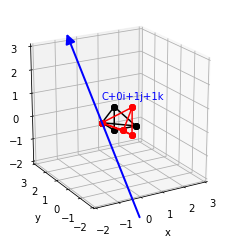

In [16]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=240, roll=0)
ax.plot([O[0],B[0]], [O[1],B[1]], [O[2],B[2]], 'ko', linestyle='-')
ax.plot([O[0],C[0]], [O[1],C[1]], [O[2],C[2]], 'ko', linestyle='-')
ax.plot([O[0],D[0]], [O[1],D[1]], [O[2],D[2]], 'ko', linestyle='-')
ax.plot([C[0],B[0]], [C[1],B[1]], [C[2],B[2]], 'ko', linestyle='-')
ax.plot([D[0],B[0]], [D[1],B[1]], [D[2],B[2]], 'ko', linestyle='-')
ax.plot([C[0],D[0]], [C[1],D[1]], [C[2],D[2]], 'ko', linestyle='-')
ax.plot([O3[0],C3[0]], [O3[1],C3[1]], [O3[2],C3[2]], 'ro', linestyle='-')
ax.plot([O3[0],B3[0]], [O3[1],B3[1]], [O3[2],B3[2]], 'ro', linestyle='-')
ax.plot([O3[0],D3[0]], [O3[1],D3[1]], [O3[2],D3[2]], 'ro', linestyle='-')
ax.plot([C3[0],B3[0]], [C3[1],B3[1]], [C3[2],B3[2]], 'ro', linestyle='-')
ax.plot([C3[0],D3[0]], [C3[1],D3[1]], [C3[2],D3[2]], 'ro', linestyle='-')
ax.plot([D3[0],B3[0]], [D3[1],B3[1]], [D3[2],B3[2]], 'ro', linestyle='-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
vstring="C+{}i+{}j+{}k".format(v[0],v[1],v[2])
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='b', shrinkA=0, shrinkB=0, linewidth=2)
a = Arrow3D([C[0]-3*v[0], C[0]+3*v[0]], [C[1]-3*v[1], C[1]+3*v[1]], [C[2]-3*v[2], C[2]+3*v[2]], **arrow_prop_dict)
ax.text(v[0], v[1], v[2], vstring, c='b')
ax.add_artist(a)
ax.axes.set_xlim3d(left=-2, right=3) 
ax.axes.set_ylim3d(bottom=-2, top=3) 
ax.axes.set_zlim3d(bottom=-2, top=3)
plt.gca().set_aspect('equal')
plt.show()

In this final image I have adjusted the viewing angle to highlight that the rotation does appear to have been performed correctly: one of the points ($C$) has not been rotated, while the others look to be rotated about $C$ and the blue axis.

## Over to you
As usual, I recommend that you apply these tools and visualisation techniques to some of the problems seen in the maths tutorial sheet. Can you use Python to confirm your approach to the matrix multiplication by hand? Can you visualise a rotation about some arbitrary axis?